In [3]:
import pandas as pd
from libsvm.svmutil import *
import numpy as np
import scatter_plot

# A2-ring-separable data
#read and parse the training set .csv features file 
df_train = pd.read_csv('Data/A2-ring/A2-ring-separable.txt', delimiter = '\t', header=None)
df_train.head()

,0,1,2
0,-0.137094,0.899654,0
1,0.542574,-0.492435,1
2,-0.658204,0.605110,0
3,-0.869820,0.519287,0
4,0.678610,0.346579,1


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [5]:
df_train.describe()

,0,1,2
count,10000.000000,10000.000000,10000.000000
mean,-0.003277,-0.000642,0.479700
std,0.574481,0.577676,0.499613
min,-0.999944,-0.999873,0.000000
25%,-0.498429,-0.498273,0.000000
50%,0.000014,-0.005922,0.000000
75%,0.490985,0.500586,1.000000
max,0.999516,0.999813,1.000000


In [6]:
# construct an array of arrays of two-input features of the train set
input_train_columns = df_train.columns[0 : 2]
train_features = df_train[input_train_columns].values

# construct an array of size of output class labels target values
outputcolumn = df_train.columns[2]
train_labels = df_train[outputcolumn].values

x_train = train_features
y_train = train_labels

In [8]:
#read and parse the test set .csv features file
df_test = pd.read_csv('Data/A2-ring/A2-ring-test.txt', delimiter = '\t', header=None)

In [9]:
# construct an array of arrays of two-input features of the train set
input_test_columns = df_test.columns[0 : 2]
test_features = df_test[input_test_columns].values

# construct an array of size of output class labels target values
outputcolumn = df_test.columns[2]
test_labels = df_test[outputcolumn].values

x_test = test_features
y_test = test_labels

In [10]:
# train the model using the training set
model = svm_train(y_train, x_train, '-t 2 -g 200 -c 100')

Accuracy = 99.38% (9938/10000) (classification)


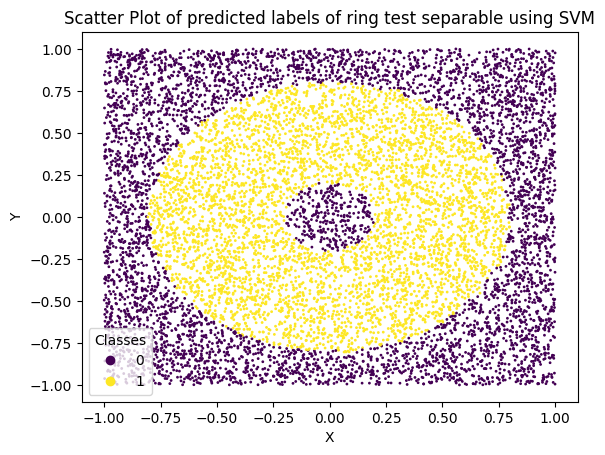

In [11]:
# Predict labels using test set
predicted_labels, accuracy, decision_values = svm_predict(test_labels, test_features, model)

predicted_labels = np.array(predicted_labels)
x = test_features[:,0]
y = test_features[:,1]
output = predicted_labels
sizes = np.full((1, output.shape[0]), 1)
scatter_plot.scatter_plot(x, y, output, sizes, 'Scatter Plot of predicted labels of ring test separable using SVM')
